In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
climate_ds_jan = xr.open_dataset(f"/data/notebooks/jupyterlab-biascorrlab/data/Lima2021/AP_Daily_Snowfall_044_QMCorrected.nc")

In [4]:
climate_ds_jan

<xarray.Dataset>
Dimensions:                     (time: 589, grid_latitude: 30, grid_longitude: 35, bnds: 2)
Coordinates:
  * time                        (time) datetime64[ns] 1981-01-01T12:00:00 ......
  * grid_latitude               (grid_latitude) float32 -3.96 -3.52 ... 8.36 8.8
  * grid_longitude              (grid_longitude) float32 154.5 154.9 ... 169.4
    latitude                    (grid_latitude, grid_longitude) float64 ...
    longitude                   (grid_latitude, grid_longitude) float64 ...
Dimensions without coordinates: bnds
Data variables: (12/13)
    prsn                        (time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  (time) float64 ...
    time_bnds                   (time, bnds) datetime64[ns] ...
    alpha_pred_mean             (grid_latitude, grid_longitude) float64 ...
    beta_pred_mean              (grid_latitude, grid_longitude) float64 ...
    p_pred_mean                 (grid_latitude, grid_longitude) float64 ...
    ...                          ...
    beta_pred_var               (grid_latitude, grid_longitude) float64 ...
    p_pred_var                  (grid_latitude, grid_longitude) float64 ...
    ecdf                        (time, grid_latitude, grid_longitude) float64 ...
    diff_p                      (grid_latitude, grid_longitude) float64 ...
    corrected_prsn              (time, grid_latitude, grid_longitude) float64 ...
    corrected_ecdf              (time, grid_latitude, grid_longitude) float64 ...
Attributes:
    source:       Data from Met Office Unified Model version 11.1
    title:        Antarctic CORDEX MetUM 0.44 degree 6-hourly mean snowfall flux
    Conventions:  CF-1.7

In [3]:
positive_diff = climate_ds_jan.diff_p>0
negative_diff = climate_ds_jan.diff_p<0
non_zero = climate_ds_jan.prsn > 0
lower_ecdf_than_min_pred = climate_ds_jan.ecdf < (1-climate_ds_jan.p_pred_mean)
greater_ecdf_than_min_pred = climate_ds_jan.ecdf > (1-climate_ds_jan.p_pred_mean)
convert_to_zero = non_zero & lower_ecdf_than_min_pred

# Positive Difference in Probability of Snowfall

In [4]:
example_positive_diff_index = np.argwhere(positive_diff.data)[10]
example_positive_diff_climate_ds_jan = climate_ds_jan.isel(grid_latitude=example_positive_diff_index[0],grid_longitude=example_positive_diff_index[1])

In [5]:
example_positive_diff_climate_ds_jan = example_positive_diff_climate_ds_jan.reset_index('time', drop=False)

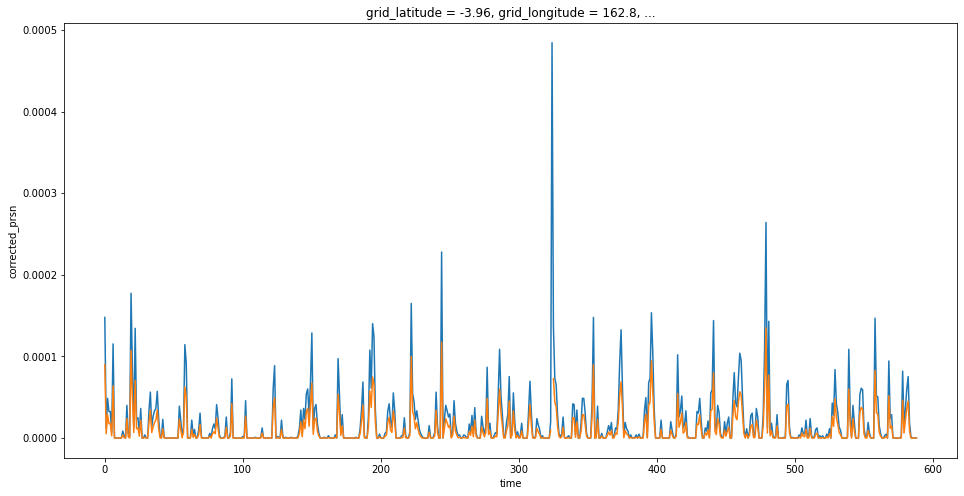

In [6]:
plt.figure(figsize=(16,8))
(example_positive_diff_climate_ds_jan.prsn).plot()
(example_positive_diff_climate_ds_jan.corrected_prsn).plot()

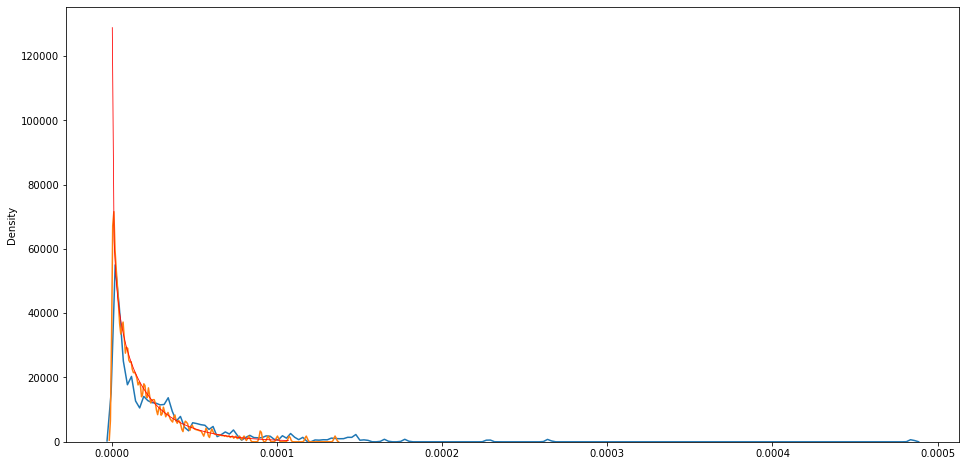

In [7]:
plt.figure(figsize=(16,8))

data = example_positive_diff_climate_ds_jan

sns.kdeplot(data=data.prsn[data.prsn!=0], bw_adjust=.1)
sns.kdeplot(data=data.corrected_prsn[data.corrected_prsn!=0], bw_adjust=.1)

gamma = stats.gamma(a=data.alpha_pred_mean,loc=0, scale=1/data.beta_pred_mean)

x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
plt.plot(x/10**5, gamma.pdf(x)*10**5,
       'r-', lw=0.8, alpha=1.0, label='gamma pdf')

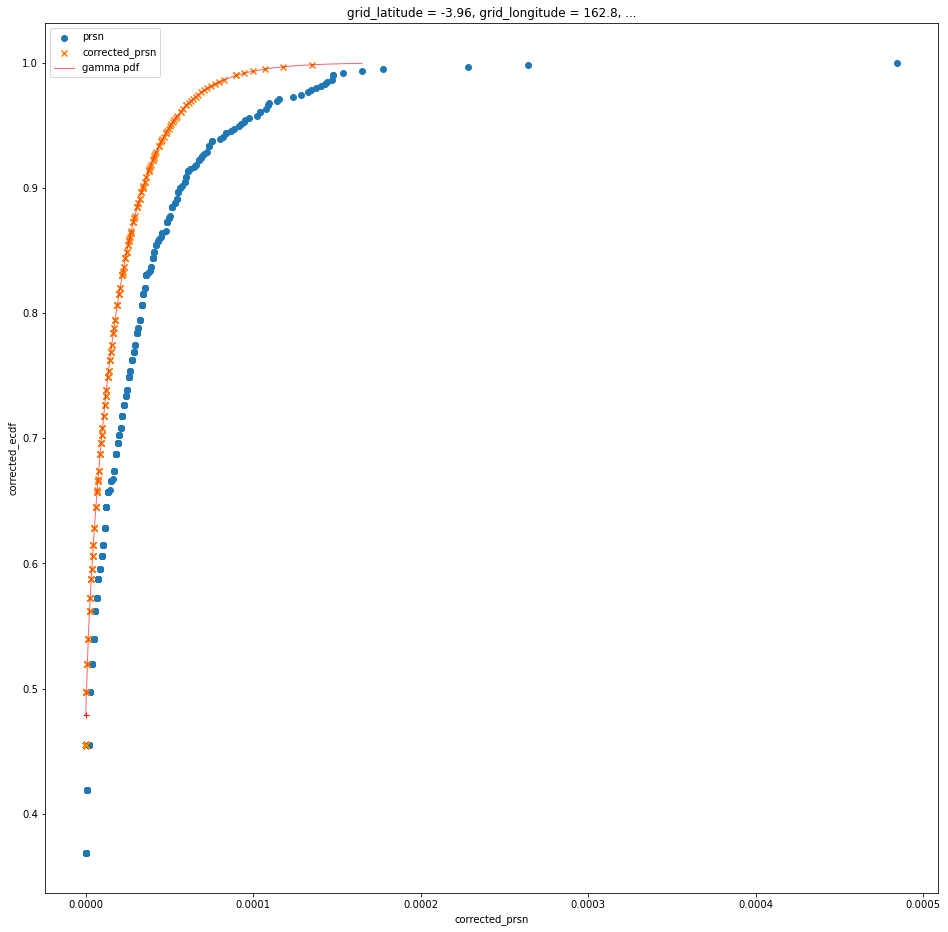

In [8]:
fig = plt.figure(figsize=(16,16))

example_positive_diff_climate_ds_jan.plot.scatter(x="prsn", y="ecdf",label='prsn')
example_positive_diff_climate_ds_jan.plot.scatter(x="corrected_prsn", y="corrected_ecdf",marker='x',label='corrected_prsn')

data = example_positive_diff_climate_ds_jan
gamma = stats.gamma(a=data.alpha_pred_mean,loc=0, scale=1/data.beta_pred_mean)
p = data.p_pred_mean

x = np.linspace(gamma.ppf(0.00001),
             gamma.ppf(0.999), 100)
x_plot = np.insert(x, 0, 0)/10**5

y_plot = np.insert(gamma.cdf(x)*p.data+(1-p.data), 0, 1-p.data)
plt.plot(x_plot, y_plot,
        'r-', lw=1, alpha=0.6, label='gamma pdf')

plt.plot(0,1-p,marker='+',color='r')

plt.legend()

# Positive Difference in Probability of Snowfall

In [9]:
example_negative_diff_index = np.argwhere(negative_diff.data)[0]
example_negative_diff_climate_ds_jan = climate_ds_jan.isel(grid_latitude=example_negative_diff_index[0],grid_longitude=example_negative_diff_index[1])

In [10]:
example_negative_diff_climate_ds_jan = example_negative_diff_climate_ds_jan.reset_index('time', drop=False)

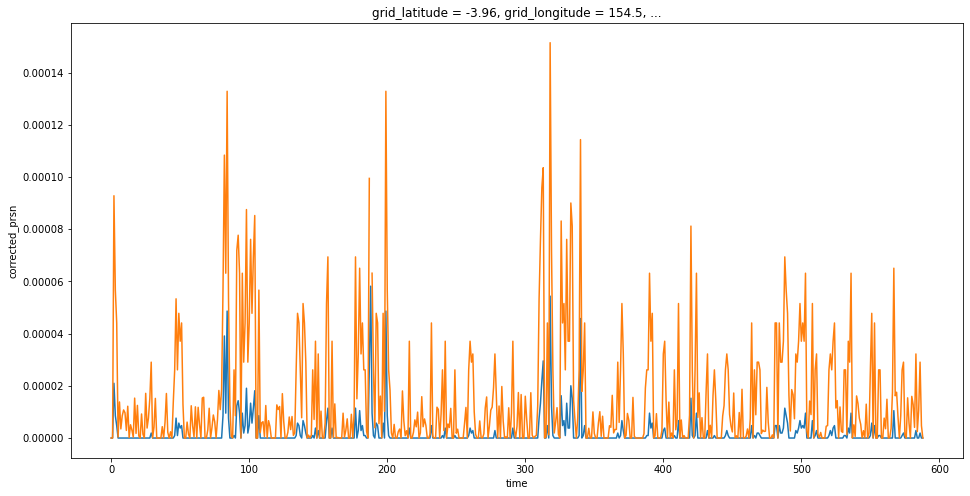

In [11]:
plt.figure(figsize=(16,8))
(example_negative_diff_climate_ds_jan.prsn).plot()
(example_negative_diff_climate_ds_jan.corrected_prsn).plot()

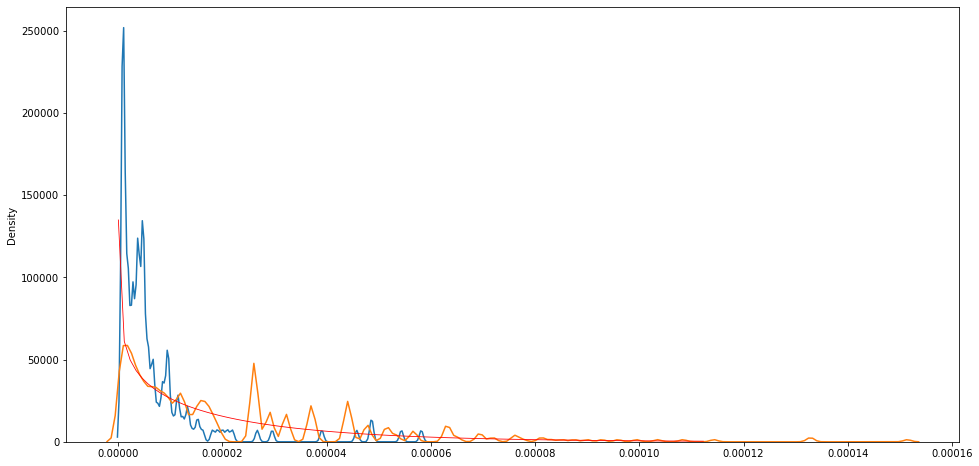

In [12]:
plt.figure(figsize=(16,8))

data = example_negative_diff_climate_ds_jan

sns.kdeplot(data=data.prsn[data.prsn!=0], bw_adjust=0.1)
sns.kdeplot(data=data.corrected_prsn[data.corrected_prsn!=0], bw_adjust=.1)

gamma = stats.gamma(a=data.alpha_pred_mean,loc=0, scale=1/data.beta_pred_mean)

x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
plt.plot(x/10**5, gamma.pdf(x)*10**5,
       'r-', lw=0.8, alpha=1.0, label='gamma pdf')

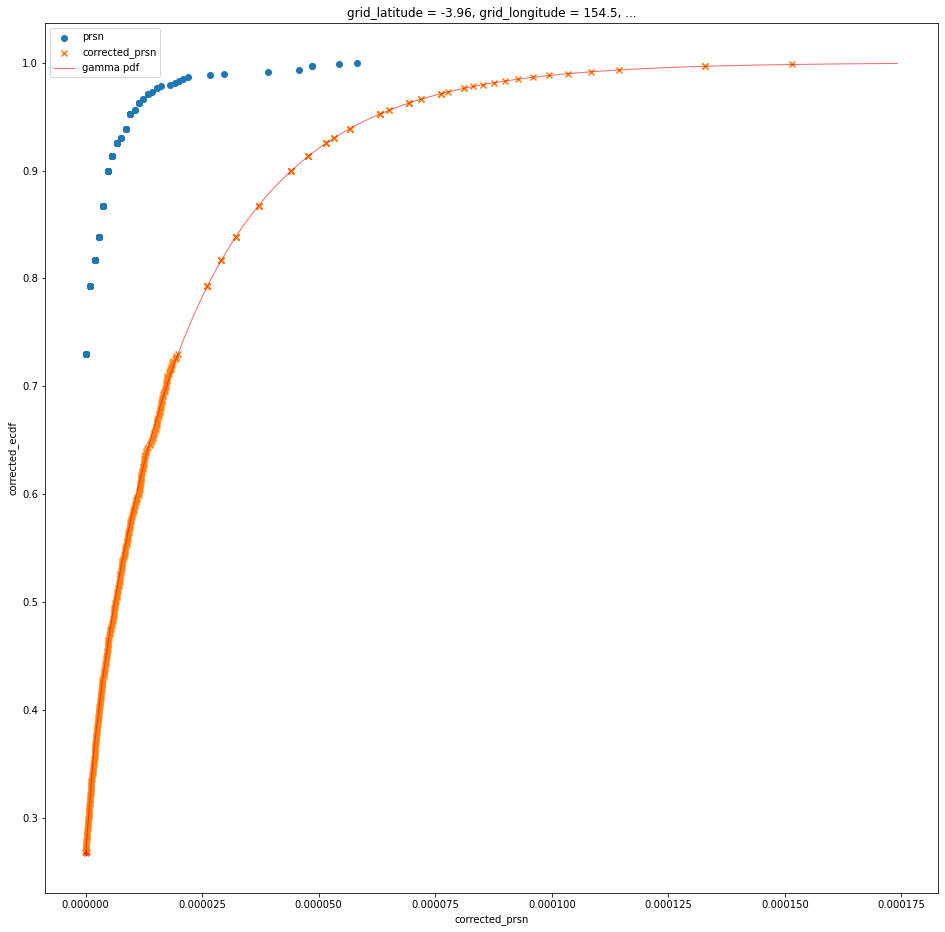

In [13]:
fig = plt.figure(figsize=(16,16))

example_negative_diff_climate_ds_jan.plot.scatter(x="prsn", y="ecdf",label='prsn')
example_negative_diff_climate_ds_jan.plot.scatter(x="corrected_prsn", y="corrected_ecdf",marker='x',label='corrected_prsn')

data = example_negative_diff_climate_ds_jan
gamma = stats.gamma(a=data.alpha_pred_mean,loc=0, scale=1/data.beta_pred_mean)
p = data.p_pred_mean

x = np.linspace(gamma.ppf(0.00),
             gamma.ppf(0.999), 100)
x_plot = np.insert(x, 0, 0)/10**5

y_plot = np.insert(gamma.cdf(x)*p.data+(1-p.data), 0, 1-p.data)
plt.plot(x_plot, y_plot,
        'r-', lw=1, alpha=0.6, label='gamma pdf')

plt.plot(0,1-p,marker='+',color='r')

plt.legend()